# GMM을 이용한 붓꽃 데이터 셋 클러스터링

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

irisDF = pd.DataFrame(data = iris.data, columns = feature_names)
irisDF['target'] = iris.target

GaussianMixture를 이용하여 붓꽃 데이터 군집화

In [9]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, random_state = 0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisDF['gmm_cluster'] = gmm_cluster_labels

iris_result = irisDF.groupby(['target'])['gmm_cluster'].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


붓꽃 데이터 k-means 군집화 결과

In [10]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [15]:
kmeans = KMeans(n_clusters = 3, init ='k-means++', max_iter = 300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisDF.groupby(['target'])['kmeans_cluster'].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


클러스터링 결과를 시각화하는 함수 생성

In [35]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter:
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    isNoise = False
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise = True
        else:
            cluster_legend = 'Cluster' + str(label)
        
        plt.scatter(x = label_cluster['ftr1'], y =label_cluster['ftr2'], s=70,
                   edgecolor = 'k', marker = markers[label], label = cluster_legend)
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x = center_x_y[0], y=center_x_y[1], s = 250, color='white',
                       alpha = 0.8, edgecolor = 'k', marker = markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',
                      edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc = 'upper center'
    else: legend_loc = 'upper right'
    plt.legend(loc=legend_loc)
    plt.show()

GMM 군집화와 k-means군집화를 비교하기 위해 타원형으로 늘어선 임의의 데이터 세트를 생성

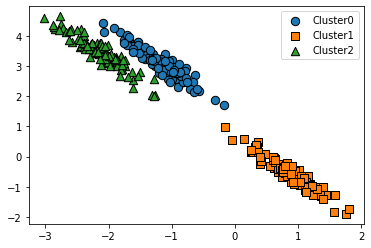

In [36]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 300, n_features=2, centers=3, cluster_std=0.5,
                 random_state=0)

transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
# feature 데이터 셋과 make_blobs()의 y 결과 값을 datagrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

kmeans 군집화 수행

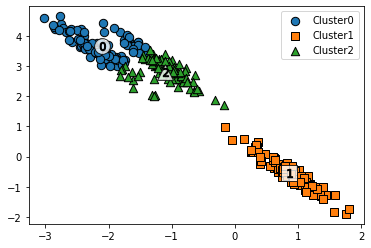

In [37]:
# 3 개의 cluster 기반 kmeans를 x_aniso 데이터 셋에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF['kmeans_label'] = kmeans_label

visualize_cluster_plot(kmeans, clusterDF, 'kmeans_label', iscenter=True)


GMM 군집화 수행

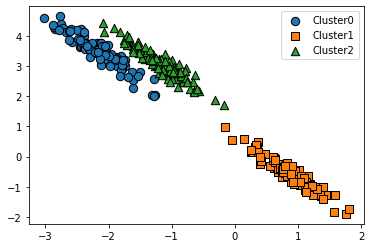

In [38]:
gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF['gmm_label'] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 false 로 설정
visualize_cluster_plot(gmm, clusterDF, 'gmm_label', iscenter = False)

GMM과 K-means 군집화 결과 비교

In [39]:
print('### KMeans Clustering ###')
print(clusterDF.groupby('target')['kmeans_label'].value_counts())
print('n/### Gaussian Mixture Clustering ###')
print(clusterDF.groupby('target')['gmm_label'].value_counts())

### KMeans Clustering ###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64
n/### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64
